In [829]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('./data/Pasien_Data_all.csv')
df.head()

,NIK/BPJS,NAMA,JK,Umur,TTL,No.HP,Jaminan Kes (BPJS/Mandiri),Alamat,Poli,Alergi,...,Tekanan Darah (mmHg),Nadi (x/menit),Berat Badan(Kg),Tinggi Badan(cm),BMI (Body Mass Index),Panjang Lahir(cm),Berat Lahir(Kg),Diagnosis,Stunting,Treatment
0,640194945577,Nurlaila Lessy,P,6,"Tokyo, 9 Mei 2017",83012112306,Mandiri,Jl. Damai,Poli Anak,NaN,...,110/90,83,53.0,155,22.1,NaN,NaN,"myalgia, Hiperkolestrol, supra cts",Tidak,Tidak Ada Treatment
1,784426371042,Agus,L,15,"Ciledug, 9 Oktober 2007",8123478327,BPJS,Jl. Sukadamai,Poli Anak,NaN,...,105/80,79,60.0,169,21.0,NaN,NaN,Demam,Tidak,Paracetamol\nibuprofen
2,868159375240,Zain,L,12,"Masohi, 21 Maret 2011",82239327571,BPJS,Jl. Perdamaian,Poli Umum,-,...,113/85,94,56.0,178,17.7,NaN,NaN,Demam,Ya,Paracetamol\nibuprofen
3,641915658142,Fadil,L,2,"Jakarta, 9 Mei 2021",81224529871,BPJS,Jl. Pasar Minggu,Poli Anak,NaN,...,100/70,93,13.0,85,18.0,50.3,2.5,Demam,Ya,Paracetamol\nibuprofen
4,871452764450,Raihan,L,20,"Rio de Janeiro, 3 September 2002",8123434353,BPJS,Jl. Raya Setiabudhi,Poli Umum,NaN,...,110/90,107,55.1,150,24.5,NaN,NaN,Asma,Tidak,-budesonide\n-fluticasone\n-beclomethasone


In [442]:
df.columns

Index(['NIK/BPJS', 'NAMA', 'JK', 'Umur', 'TTL', 'No.HP',
       'Jaminan Kes (BPJS/Mandiri)', 'Alamat', 'Poli', 'Alergi', 'Nama wali',
       'Keluhan Utama', 'Suhu(C`)', 'Tekanan Darah (mmHg)', 'Nadi (x/menit)',
       'Berat Badan(Kg)', 'Tinggi Badan(cm)', 'BMI (Body Mass Index)',
       'Panjang Lahir(cm)', 'Berat Lahir(Kg)', 'Diagnosis', 'Stunting',
       'Treatment'],
      dtype='object')

### Feature Selection

In [964]:
dt = df[['Umur','Keluhan Utama', 'Suhu(C`)', 'Tekanan Darah (mmHg)', 'Nadi (x/menit)',
       'Berat Badan(Kg)', 'Tinggi Badan(cm)', 'Diagnosis']]

dt.rename(columns={
    'Umur':'umur',
    'Keluhan Utama':'keluhan_utama',
    'Suhu(C`)':'suhu', 
    'Tekanan Darah (mmHg)':'tkd', 
    'Nadi (x/menit)':'nadi',
    'Berat Badan(Kg)':'bb', 
    'Tinggi Badan(cm)':'tb'
}, inplace=True)
dt.head()

,umur,keluhan_utama,suhu,tkd,nadi,bb,tb,Diagnosis
0,6,"Tangan keram, badan nyeri, mual, muntah",36.7,110/90,83,53.0,155,"myalgia, Hiperkolestrol, supra cts"
1,15,panas tinggi,38.5,105/80,79,60.0,169,Demam
2,12,panas tinggi,37.1,113/85,94,56.0,178,Demam
3,2,panas tinggi,38.2,100/70,93,13.0,85,Demam
4,20,"sesak nafas, batuk, batuk berdahak, lemas",35.8,110/90,107,55.1,150,Asma


In [965]:
dt[['tkd_1', 'tkd_2']] = dt['tkd'].str.split('/', expand=True).astype('int32')
dt.drop('tkd', axis=1, inplace=True)
dt.head()

,umur,keluhan_utama,suhu,nadi,bb,tb,Diagnosis,tkd_1,tkd_2
0,6,"Tangan keram, badan nyeri, mual, muntah",36.7,83,53.0,155,"myalgia, Hiperkolestrol, supra cts",110,90
1,15,panas tinggi,38.5,79,60.0,169,Demam,105,80
2,12,panas tinggi,37.1,94,56.0,178,Demam,113,85
3,2,panas tinggi,38.2,93,13.0,85,Demam,100,70
4,20,"sesak nafas, batuk, batuk berdahak, lemas",35.8,107,55.1,150,Asma,110,90


In [966]:
dt = dt.append(dt[['umur', 'suhu', 'nadi', 'bb', 'tb', 'tkd_1', 'tkd_2']]+1)
dt = dt.append(dt[['umur', 'suhu', 'nadi', 'bb', 'tb', 'tkd_1', 'tkd_2']]+2)
dt = dt.reset_index()
dt.drop('index', axis=1, inplace=True)

In [967]:
dt.head()

,umur,keluhan_utama,suhu,nadi,bb,tb,Diagnosis,tkd_1,tkd_2
0,6,"Tangan keram, badan nyeri, mual, muntah",36.7,83,53.0,155,"myalgia, Hiperkolestrol, supra cts",110,90
1,15,panas tinggi,38.5,79,60.0,169,Demam,105,80
2,12,panas tinggi,37.1,94,56.0,178,Demam,113,85
3,2,panas tinggi,38.2,93,13.0,85,Demam,100,70
4,20,"sesak nafas, batuk, batuk berdahak, lemas",35.8,107,55.1,150,Asma,110,90


In [968]:
dt['Diagnosis'].value_counts()

Demam                                 9
Campak                                6
Diare                                 6
Radang Tenggorokan                    5
Asma                                  4
Cacar                                 4
Radang Perut (Muntaber)               4
Flu                                   3
Cacingan                              3
Pneumonia                             2
DBD                                   2
myalgia, Hiperkolestrol, supra cts    1
Name: Diagnosis, dtype: int64

In [969]:
dt.tail(2)

,umur,keluhan_utama,suhu,nadi,bb,tb,Diagnosis,tkd_1,tkd_2
194,17,NaN,41.5,123,69.0,157,NaN,123,73
195,16,NaN,40.0,97,81.0,143,NaN,103,70


In [971]:
def na_randomfill(series):
    na_mask = pd.isnull(series)   # boolean mask for null values
    n_null = na_mask.sum()        # number of nulls in the Series
    
    if n_null == 0:
        return series             # if there are no nulls, no need to resample
    
    # Randomly sample the non-null values from our series
    #  only sample this Series as many times as we have nulls 
    fill_values = series[~na_mask].sample(n=n_null, replace=True, random_state=0)

    # This ensures our new values will replace NaNs in the correct locations
    #fill_values.index = series.index[na_mask]
    
    return series.fillna(fill_values) 

In [973]:
#dt['Diagnosis'] = na_randomfill(dt['Diagnosis'])
dt['keluhan_utama'] = na_randomfill(dt['keluhan_utama'])

In [974]:
dt['Diagnosis'].value_counts()

Demam                                 35
Campak                                28
Diare                                 22
Radang Perut (Muntaber)               20
Cacar                                 18
Asma                                  14
Flu                                   14
myalgia, Hiperkolestrol, supra cts    10
Radang Tenggorokan                    10
Pneumonia                              9
Cacingan                               9
DBD                                    7
Name: Diagnosis, dtype: int64

In [975]:
dt.tail(2)

,umur,keluhan_utama,suhu,nadi,bb,tb,Diagnosis,tkd_1,tkd_2
194,17,"Tangan keram, badan nyeri, mual, muntah",41.5,123,69.0,157,"myalgia, Hiperkolestrol, supra cts",123,73
195,16,ruam pada kulit (berisi air),40.0,97,81.0,143,Cacar,103,70


In [900]:
dt['keluhan_utama'].unique()[11]

'suhu tubuh tinggi, tidak nafsu makan, kepala pusing'

In [901]:
temp = []
for x in range(len(dt['Diagnosis'])):
    cond = np.where(dt.Diagnosis.loc[x] == dt.Diagnosis.unique()[0], 'Tangan keram, badan nyeri, mual, muntah', 
                    np.where(dt.Diagnosis.loc[x] == dt.Diagnosis.unique()[1], 'panas tinggi', 
                    np.where(dt.Diagnosis.loc[x] == dt.Diagnosis.unique()[2], 'sesak nafas, batuk, batuk berdahak, lemas', 
                    np.where(dt.Diagnosis.loc[x] == dt.Diagnosis.unique()[3], 'ruam ruam merah pada kulit', 
                    np.where(dt.Diagnosis.loc[x] == dt.Diagnosis.unique()[4], 'melilit, pup cair', 
                    np.where(dt.Diagnosis.loc[x] == dt.Diagnosis.unique()[5], 'terjadi infeksi pada paru-paru', 
                    np.where(dt.Diagnosis.loc[x] == dt.Diagnosis.unique()[6], 'ruam pada kulit (berisi air)', 
                    np.where(dt.Diagnosis.loc[x] == dt.Diagnosis.unique()[7], 'batuk,pilek,panas dalam', 
                    np.where(dt.Diagnosis.loc[x] == dt.Diagnosis.unique()[8], 'mual,pup cair', 
                    np.where(dt.Diagnosis.loc[x] == dt.Diagnosis.unique()[9], 'Tenggorokan sakit. Sakit waktu menelan, Tenggorokan bengkak', 
                    np.where(dt.Diagnosis.loc[x] == dt.Diagnosis.unique()[10],'nyari perut, gatal di anus, mual, muntah', 
                    np.where(dt.Diagnosis.loc[x] == dt.Diagnosis.unique()[11],'suhu tubuh tinggi, tidak nafsu makan, kepala pusing', 'unknown'))))))))))))
    temp.append(cond.tolist())
dt['keluhan_utama'] = temp

In [976]:
dt['keluhan_utama'].value_counts()

panas tinggi                                                   35
ruam ruam merah pada kulit                                     28
melilit, pup cair                                              22
mual,pup cair                                                  20
ruam pada kulit (berisi air)                                   18
sesak nafas, batuk, batuk berdahak, lemas                      14
batuk,pilek,panas dalam                                        14
Tangan keram, badan nyeri, mual, muntah                        10
Tenggorokan sakit. Sakit waktu menelan, Tenggorokan bengkak    10
terjadi infeksi pada paru-paru                                  9
nyari perut, gatal di anus, mual, muntah                        9
suhu tubuh tinggi, tidak nafsu makan, kepala pusing             7
Name: keluhan_utama, dtype: int64

In [977]:
encoder = LabelEncoder()
dt['keluhan_utama'] = encoder.fit_transform(dt['keluhan_utama'])
dt.head()

,umur,keluhan_utama,suhu,nadi,bb,tb,Diagnosis,tkd_1,tkd_2
0,6,0,36.7,83,53.0,155,"myalgia, Hiperkolestrol, supra cts",110,90
1,15,6,38.5,79,60.0,169,Demam,105,80
2,12,6,37.1,94,56.0,178,Demam,113,85
3,2,6,38.2,93,13.0,85,Demam,100,70
4,20,9,35.8,107,55.1,150,Asma,110,90


In [978]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   umur           196 non-null    int64  
 1   keluhan_utama  196 non-null    int32  
 2   suhu           196 non-null    float64
 3   nadi           196 non-null    int64  
 4   bb             196 non-null    float64
 5   tb             196 non-null    int64  
 6   Diagnosis      196 non-null    object 
 7   tkd_1          196 non-null    int32  
 8   tkd_2          196 non-null    int32  
dtypes: float64(2), int32(3), int64(3), object(1)
memory usage: 11.6+ KB


In [979]:
label = pd.get_dummies(dt['Diagnosis'], columns=['Diagnosis'])
dt.drop('Diagnosis', axis=1, inplace=True)
label.head()

,Asma,Cacar,Cacingan,Campak,DBD,Demam,Diare,Flu,Pneumonia,Radang Perut (Muntaber),Radang Tenggorokan,"myalgia, Hiperkolestrol, supra cts"
0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0


In [980]:
labels = np.array(label)

In [981]:
scaler = MinMaxScaler()
dt_scaler = scaler.fit_transform(dt)
dt_scaler[3]

array([0.04166667, 0.54545455, 0.47761194, 0.52380952, 0.07894737,
       0.13392857, 0.27777778, 0.25641026])

In [1000]:
X_train, X_test, y_train, y_test = train_test_split(dt_scaler, labels, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [1001]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(124, 8)
(40, 8)
(32, 8)


In [1002]:
y_train[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=uint8)

In [1003]:
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(124, 12)
(40, 12)
(32, 12)


## Model Train

In [1004]:
import tensorflow as tf
import keras_tuner as kt
from tensorflow.keras import layers, Sequential, optimizers, losses, regularizers

In [1005]:
X_train.shape[-1]

8

In [1013]:
model = Sequential([
    layers.Dense(128, input_shape=(X_train.shape[-1],), activation='relu'),
    layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.Dropout(0.01),
    layers.Dense(24, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.Dropout(0.01),
    layers.Dense(12, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

log = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=200,
    verbose=1,
    batch_size=32
)

Epoch 1/200


4/4 [==============================] - 1s 37ms/step - loss: 4.1246 - accuracy: 0.1290 - val_loss: 4.0780 - val_accuracy: 0.1562
Epoch 2/200
4/4 [==============================] - 0s 7ms/step - loss: 3.9888 - accuracy: 0.1774 - val_loss: 3.9708 - val_accuracy: 0.2188
Epoch 3/200
4/4 [==============================] - 0s 6ms/step - loss: 3.8686 - accuracy: 0.1694 - val_loss: 3.8719 - val_accuracy: 0.2188
Epoch 4/200
4/4 [==============================] - 0s 7ms/step - loss: 3.7568 - accuracy: 0.1694 - val_loss: 3.7842 - val_accuracy: 0.2188
Epoch 5/200
4/4 [==============================] - 0s 7ms/step - loss: 3.6470 - accuracy: 0.1613 - val_loss: 3.7005 - val_accuracy: 0.2188
Epoch 6/200
4/4 [==============================] - 0s 7ms/step - loss: 3.5477 - accuracy: 0.1774 - val_loss: 3.6233 - val_accuracy: 0.2188
Epoch 7/200
4/4 [==============================] - 0s 7ms/step - loss: 3.4549 - accuracy: 0.1694 - val_loss: 3.5564 - val_accuracy: 0.1875
Epoch 8/200
4/4 [=====================

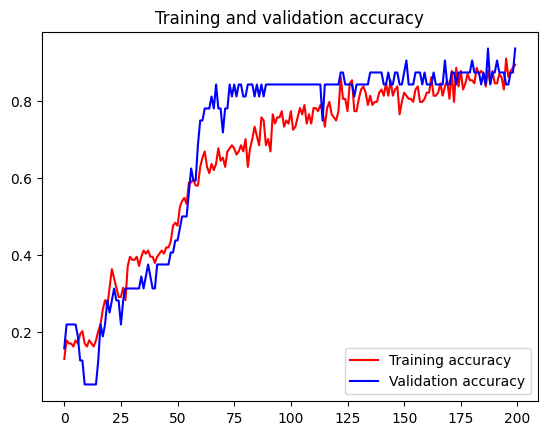

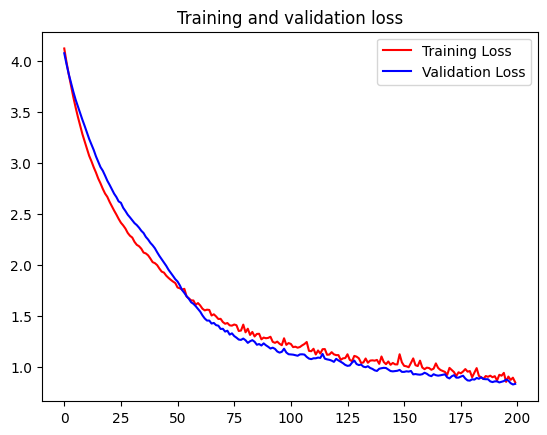

In [1014]:
acc = log.history['accuracy']
val_acc = log.history['val_accuracy']
loss = log.history['loss']
val_loss = log.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [1015]:
dt.loc[0]

umur               6.0
keluhan_utama      0.0
suhu              36.7
nadi              83.0
bb                53.0
tb               155.0
tkd_1            110.0
tkd_2             90.0
Name: 0, dtype: float64

In [1016]:
X_test[:1]

array([[0.29166667, 0.72727273, 0.3880597 , 0.77777778, 0.5       ,
        0.94642857, 0.86111111, 0.64102564]])

In [1017]:
label

,Asma,Cacar,Cacingan,Campak,DBD,Demam,Diare,Flu,Pneumonia,Radang Perut (Muntaber),Radang Tenggorokan,"myalgia, Hiperkolestrol, supra cts"
0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
191,0,0,0,0,0,1,0,0,0,0,0,0
192,0,0,0,0,0,0,0,0,0,1,0,0
193,0,0,0,0,0,0,0,0,1,0,0,0
194,0,0,0,0,0,0,0,0,0,0,0,1


In [1018]:
model.predict([[10, 1, 38, 89, 45, 130, 112, 70]])

1/1 [==============================] - 0s 56ms/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 5.1028226e-10, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00]],
      dtype=float32)

In [1019]:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 2ms/step


In [1020]:
y_pred = np.where(y_pred > 0.5, 1, 0)
print(classification_report(y_test, y_pred,
                      output_dict=False,
                      target_names=['Asma', 'Cacar', 'Cacingan', 'Campak', 'DBD', 'Demam', 'Diare', 'Flu',
                                    'Pneumonia', 'Radang Perut (Muntaber)', 'Radang Tenggorokan',
                                    'myalgia, Hiperkolestrol, supra cts']
                            ))

                                    precision    recall  f1-score   support

                              Asma       0.00      0.00      0.00         6
                             Cacar       1.00      0.75      0.86         4
                          Cacingan       0.00      0.00      0.00         2
                            Campak       0.86      1.00      0.92         6
                               DBD       0.00      0.00      0.00         2
                             Demam       0.86      0.86      0.86         7
                             Diare       1.00      1.00      1.00         4
                               Flu       0.00      0.00      0.00         0
                         Pneumonia       0.00      0.00      0.00         0
           Radang Perut (Muntaber)       1.00      1.00      1.00         5
                Radang Tenggorokan       0.00      0.00      0.00         2
myalgia, Hiperkolestrol, supra cts       1.00      0.50      0.67         2

          

In [1021]:
cm

array([[[34,  0],
        [ 6,  0]],

       [[36,  0],
        [ 1,  3]],

       [[38,  0],
        [ 2,  0]],

       [[32,  2],
        [ 0,  6]],

       [[38,  0],
        [ 2,  0]],

       [[32,  1],
        [ 1,  6]],

       [[36,  0],
        [ 0,  4]],

       [[40,  0],
        [ 0,  0]],

       [[40,  0],
        [ 0,  0]],

       [[35,  0],
        [ 0,  5]],

       [[38,  0],
        [ 2,  0]],

       [[38,  0],
        [ 0,  2]]], dtype=int64)

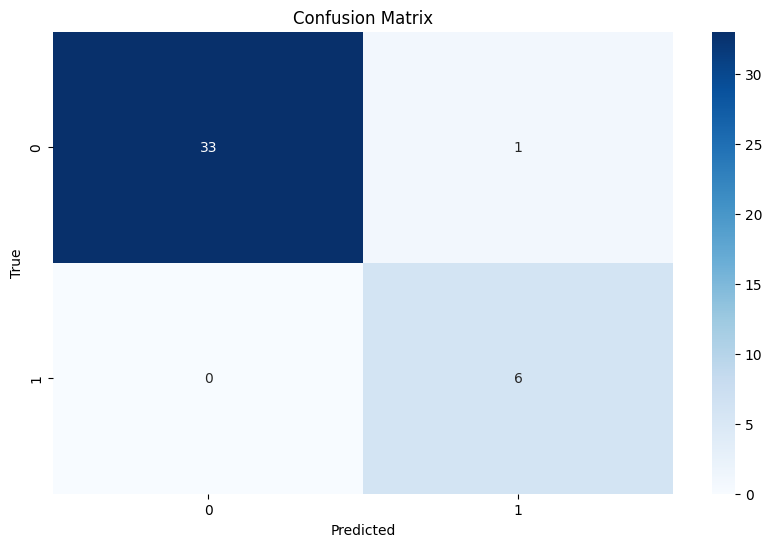

In [1023]:
cm = multilabel_confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm[3], annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [797]:
model.save('./model/disease_model.h5')
convert = tf.lite.TFLiteConverter.from_keras_model(model)
tflite = convert.convert()

with open('./model/disease_model.tflite', 'wb') as f:
    f.write(tflite)

INFO:tensorflow:Assets written to: C:\Users\KAZU\AppData\Local\Temp\tmpygcx9job\assets


INFO:tensorflow:Assets written to: C:\Users\KAZU\AppData\Local\Temp\tmpygcx9job\assets


## HyperTuning

In [596]:
def build_model(hp):
        model = Sequential()
        model.add(
                layers.Dense(units=hp.Int("units_", min_value=8, max_value=128, step=16), input_shape=(8,), activation="relu")
        )
        for i in range(1, hp.Int("num_layers", 1,5)):
                model.add(
                        layers.Dense(units=hp.Int("units_" + str(i), min_value=6, max_value=512, step=32), activation="relu")
                )
                
        model.add(
                layers.Dense(units=12, activation="softmax")
        )

        lr = hp.Choice("learning_rate", values=[1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6])

        model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=lr),
                      loss = tf.keras.losses.CategoricalCrossentropy(),
                      metrics=["accuracy"]
                      )     
        
        return model

In [597]:
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=80,
    factor=3,
    hyperband_iterations=10,
    project_name='disease_tune'
)

In [598]:
tuner.search_space_summary()

Search space summary
Default search space size: 3
units_ (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 128, 'step': 16, 'sampling': 'linear'}
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 5, 'step': 1, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06], 'ordered': True}


In [600]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=7)
tuner.search(X_train, y_train, 
             validation_data=(X_val, y_val), 
             epochs=100, 
             callbacks=[stop_early], 
             verbose=1)

INFO:tensorflow:Oracle triggered exit
